#Question: 
* Percentage of Degrees Awarded in that state (Nick)
     - Time Series Trend before and after 2020


# Assumptions
* Removed certifications columns starting with CIP

# Install and Import Packages

In [ ]:
!pip install pandas numpy seaborn sklearn matplotlib shap &> /dev/null
!echo "Installed Python packages"

Installed Python packages


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab import files

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format

# Import File:

In [ ]:
drive.mount('/content/gdrive') # Mount the drive

df = pd.read_csv("gdrive/MyDrive/W200_Project_2/w200_project2_cleaned_v1.csv") # from my drive, change path to gdrive/Shareddrives... if not located in MyDrive
ref_df = pd.read_csv("gdrive/MyDrive/W200_Project_2/Reference_table.csv") # add the reference table for lookup
df_desc = pd.read_csv("gdrive/MyDrive/W200_Project_2/w200_dataset_description.csv") # Add the description table



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,48,50,82,83,108,156,160,174) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df = df.drop(columns = ['Unnamed: 0'])
ref_df = ref_df.drop(columns = ['Unnamed: 0'])

In [ ]:
MAIN_REFF = {"UNITID":"Unit ID for institution",
                   "INSTNM":"Institution name",
                   "STATE_ABBREVIATION":"State postcode",
                    "ENDYEAR": "End of school year year",
                   "OVERALL_YR2_N":"Number of students in overall 2-year completion cohort",
                   "OVERALL_YR3_N":"Number of students in overall 3-year completion cohort",
                   "OVERALL_YR4_N":"Number of students in overall 4-year completion cohort",
                   "OVERALL_YR6_N": "Number of students in overall 6-year completion cohort",
                   "OVERALL_YR8_N": "Number of students in overall 8-year completion cohort",
             "MD_EARN_WNE_P10": "Median earnings of students working and not enrolled ten years after enrolling",
             "PREDDEG": "Primary degree offered"
                   }

# Use the keys from MAIN_REFF as column names
main_columns = [column for column in MAIN_REFF.keys()]

# Select all columns that contain PCIP* 
percent_degrees_df = df.filter(regex = 'PCIP*')
main_df = df[df.columns & main_columns]
df = pd.concat([main_df, percent_degrees_df], axis=1)

var_dict = ref_df[ref_df['variable_name'].isin(percent_degrees_df)][['variable_name','label']] # pull out labels
var_dict = dict(zip(var_dict.iloc[:, 0], var_dict.iloc[:, 1])) # create dictionary for later

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead


# Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48477 entries, 0 to 48476
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ENDYEAR             48477 non-null  int64  
 1   INSTNM              48477 non-null  object 
 2   MD_EARN_WNE_P10     13309 non-null  float64
 3   OVERALL_YR2_N       41502 non-null  float64
 4   OVERALL_YR3_N       39587 non-null  float64
 5   OVERALL_YR4_N       37654 non-null  float64
 6   OVERALL_YR6_N       33704 non-null  float64
 7   OVERALL_YR8_N       29657 non-null  float64
 8   PREDDEG             48477 non-null  object 
 9   STATE_ABBREVIATION  48477 non-null  object 
 10  UNITID              48477 non-null  int64  
 11  PCIP01              48388 non-null  float64
 12  PCIP03              48388 non-null  float64
 13  PCIP04              48388 non-null  float64
 14  PCIP05              48388 non-null  float64
 15  PCIP09              48388 non-null  float64
 16  PCIP

In [ ]:
df = df[df['ENDYEAR'] == 2019]
df['MD_EARN_WNE_P10'] = df['MD_EARN_WNE_P10'].astype(float)
df.loc[(df.OVERALL_YR2_N == 'PrivacySuppressed'),'OVERALL_YR2_N']='0'
df['OVERALL_YR2_N'] = df['OVERALL_YR2_N'].astype(float)
df.loc[(df.OVERALL_YR3_N == 'PrivacySuppressed'),'OVERALL_YR3_N']='0'
df['OVERALL_YR3_N'] = df['OVERALL_YR3_N'].astype(float)
df.loc[(df.OVERALL_YR4_N == 'PrivacySuppressed'),'OVERALL_YR4_N']='0'
df['OVERALL_YR4_N'] = df['OVERALL_YR4_N'].astype(float)
df.loc[(df.OVERALL_YR6_N == 'PrivacySuppressed'),'OVERALL_YR6_N']='0'
df['OVERALL_YR6_N'] = df['OVERALL_YR6_N'].astype(float)
df.loc[(df.OVERALL_YR8_N == 'PrivacySuppressed'),'OVERALL_YR8_N']='0'
df['OVERALL_YR8_N'] = df['OVERALL_YR8_N'].astype(float)
df.drop(columns=['ENDYEAR'], inplace = True)
df['TOTAL_ENROLLMENT'] = df['OVERALL_YR2_N'] + df['OVERALL_YR3_N'] + df['OVERALL_YR4_N'] + df['OVERALL_YR6_N']+ df['OVERALL_YR8_N']
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,INSTNM,MD_EARN_WNE_P10,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,PREDDEG,STATE_ABBREVIATION,UNITID,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,TOTAL_ENROLLMENT
12028,Alabama A & M University,"36,339.00","1,691.00","1,538.00","1,368.00","1,243.00","1,320.00",Predominantly bachelor's-degree granting,AL,100654,0.04,0.02,0.00,0.00,0.00,0.04,0.06,0.00,0.07,0.12,0.02,0.00,0.04,0.00,0.02,0.05,0.00,0.09,0.01,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.06,0.06,0.05,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.16,0.00,"7,160.00"
12029,University of Alabama at Birmingham,"46,990.00","3,163.00","2,689.00","2,729.00","2,672.00","2,591.00",Predominantly bachelor's-degree granting,AL,100663,0.00,0.00,0.00,0.00,0.04,0.00,0.01,0.00,0.07,0.08,0.00,0.00,0.00,0.00,0.02,0.04,0.00,0.09,0.01,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.06,0.03,0.03,0.03,0.00,0.00,0.00,0.00,0.03,0.23,0.19,0.01,"13,844.00"
12030,Amridge University,"37,895.00",151.00,128.00,135.00,205.00,146.00,Predominantly bachelor's-degree granting,AL,100690,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.18,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.00,765.00
12031,University of Alabama in Huntsville,"54,361.00","1,419.00","1,294.00","1,175.00","1,128.00","1,129.00",Predominantly bachelor's-degree granting,AL,100706,0.00,0.00,0.00,0.00,0.02,0.00,0.06,0.00,0.03,0.29,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.04,0.02,0.00,0.00,0.02,0.00,0.00,0.03,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.04,0.15,0.21,0.01,"6,145.00"
12032,Alabama State University,"32,084.00","1,283.00","1,251.00","1,282.00","1,897.00","1,397.00",Predominantly bachelor's-degree granting,AL,100724,0.00,0.00,0.00,0.00,0.09,0.00,0.06,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.08,0.02,0.00,0.02,0.01,0.00,0.00,0.02,0.00,0.06,0.09,0.06,0.01,0.00,0.00,0.00,0.00,0.06,0.17,0.11,0.00,"7,110.00"


In [ ]:
df_grouped_state = df.groupby(['STATE_ABBREVIATION'], as_index=False).sum()
df_grouped_state.head()

,STATE_ABBREVIATION,MD_EARN_WNE_P10,OVERALL_YR2_N,OVERALL_YR3_N,OVERALL_YR4_N,OVERALL_YR6_N,OVERALL_YR8_N,UNITID,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,TOTAL_ENROLLMENT
0,AK,"138,886.00","3,210.00","3,403.00","3,715.00","4,096.00","4,561.00",410416,0.00,0.10,0.00,0.00,0.03,0.00,0.04,0.02,0.06,0.15,0.11,0.02,0.01,0.01,0.03,0.34,0.00,0.10,0.01,0.00,0.24,0.20,0.01,1.00,0.04,0.01,0.29,0.10,0.05,0.05,0.03,0.07,0.03,0.03,0.04,0.41,0.37,0.01,"18,960.00"
1,AL,"1,354,620.00","56,030.00","56,003.00","58,901.00","63,071.00","72,113.00",4047747,0.25,0.13,0.04,0.03,1.04,0.04,0.93,0.02,2.44,1.13,0.36,0.10,0.55,0.10,0.57,0.86,0.00,1.88,0.38,0.00,0.46,1.41,0.18,1.54,0.36,0.00,1.62,1.54,0.75,0.93,0.00,0.01,0.00,0.00,1.08,4.21,7.60,0.44,"306,118.00"
2,AR,"919,136.00","34,735.00","33,314.00","34,438.00","36,644.00","38,370.00",3536956,0.17,0.09,0.01,0.00,0.50,0.00,0.57,0.00,1.43,0.32,0.14,0.13,0.26,0.00,0.36,2.20,0.00,1.33,0.21,0.00,0.84,0.87,0.61,0.78,0.35,0.00,1.35,0.37,0.36,0.78,0.00,0.15,0.10,0.03,0.72,2.68,4.97,0.31,"177,501.00"
3,AZ,"1,003,883.00","205,497.00","209,603.00","232,029.00","237,777.00","281,518.00",6321976,0.02,0.25,0.15,0.02,0.62,0.53,1.05,0.00,1.51,0.83,0.20,0.05,0.18,0.02,0.25,0.26,0.00,0.51,0.09,0.22,0.43,0.44,0.03,0.79,0.13,0.61,1.08,0.73,0.42,0.73,0.00,0.00,0.00,0.42,1.09,2.62,3.60,0.12,"1,166,424.00"
4,CA,"7,169,295.00","251,722.00","256,058.00","291,660.00","316,442.00","381,722.00",31005944,1.37,1.09,2.42,0.53,4.04,1.53,4.61,0.00,2.74,3.81,0.87,0.69,2.40,0.78,2.12,8.64,0.00,5.45,1.25,0.00,3.59,3.58,0.72,11.27,1.56,0.00,11.77,1.59,1.15,8.99,0.00,0.00,0.02,0.37,15.65,13.57,26.78,1.03,"1,496,975.00"


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 12028 to 14085
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INSTNM              1876 non-null   object 
 1   MD_EARN_WNE_P10     1876 non-null   float64
 2   OVERALL_YR2_N       1876 non-null   float64
 3   OVERALL_YR3_N       1876 non-null   float64
 4   OVERALL_YR4_N       1876 non-null   float64
 5   OVERALL_YR6_N       1876 non-null   float64
 6   OVERALL_YR8_N       1876 non-null   float64
 7   PREDDEG             1876 non-null   object 
 8   STATE_ABBREVIATION  1876 non-null   object 
 9   UNITID              1876 non-null   int64  
 10  PCIP01              1876 non-null   float64
 11  PCIP03              1876 non-null   float64
 12  PCIP04              1876 non-null   float64
 13  PCIP05              1876 non-null   float64
 14  PCIP09              1876 non-null   float64
 15  PCIP10              1876 non-null   float64
 16  P

In [ ]:
tmp_condensed_state_df = df.drop_duplicates('INSTNM')
condensed_state_df = tmp_condensed_state_df[['STATE_ABBREVIATION',]].groupby(by='STATE_ABBREVIATION', as_index=False).size()
condensed_state_df

,STATE_ABBREVIATION,size
0,AK,3
1,AL,32
2,AR,22
3,AZ,20
4,CA,118
5,CO,24
6,CT,24
7,DC,11
8,DE,6
9,FL,66


In [ ]:
condensed_state_df[['size']].agg('sum')

size    1857
dtype: int64

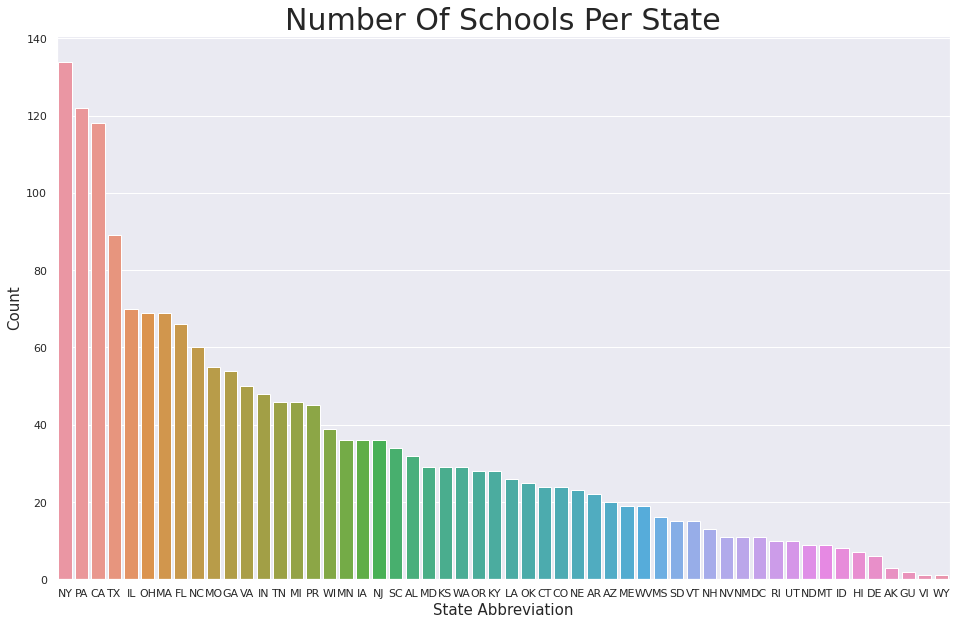

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})
sns.barplot(x="STATE_ABBREVIATION", y="size", data=condensed_state_df.sort_values(by=['size'], ascending=False));
fig = plt.xlabel("State Abbreviation", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.title("Number Of Schools Per State", fontsize = 30) # You can comment this line out if you don't need title
plt.show(fig)

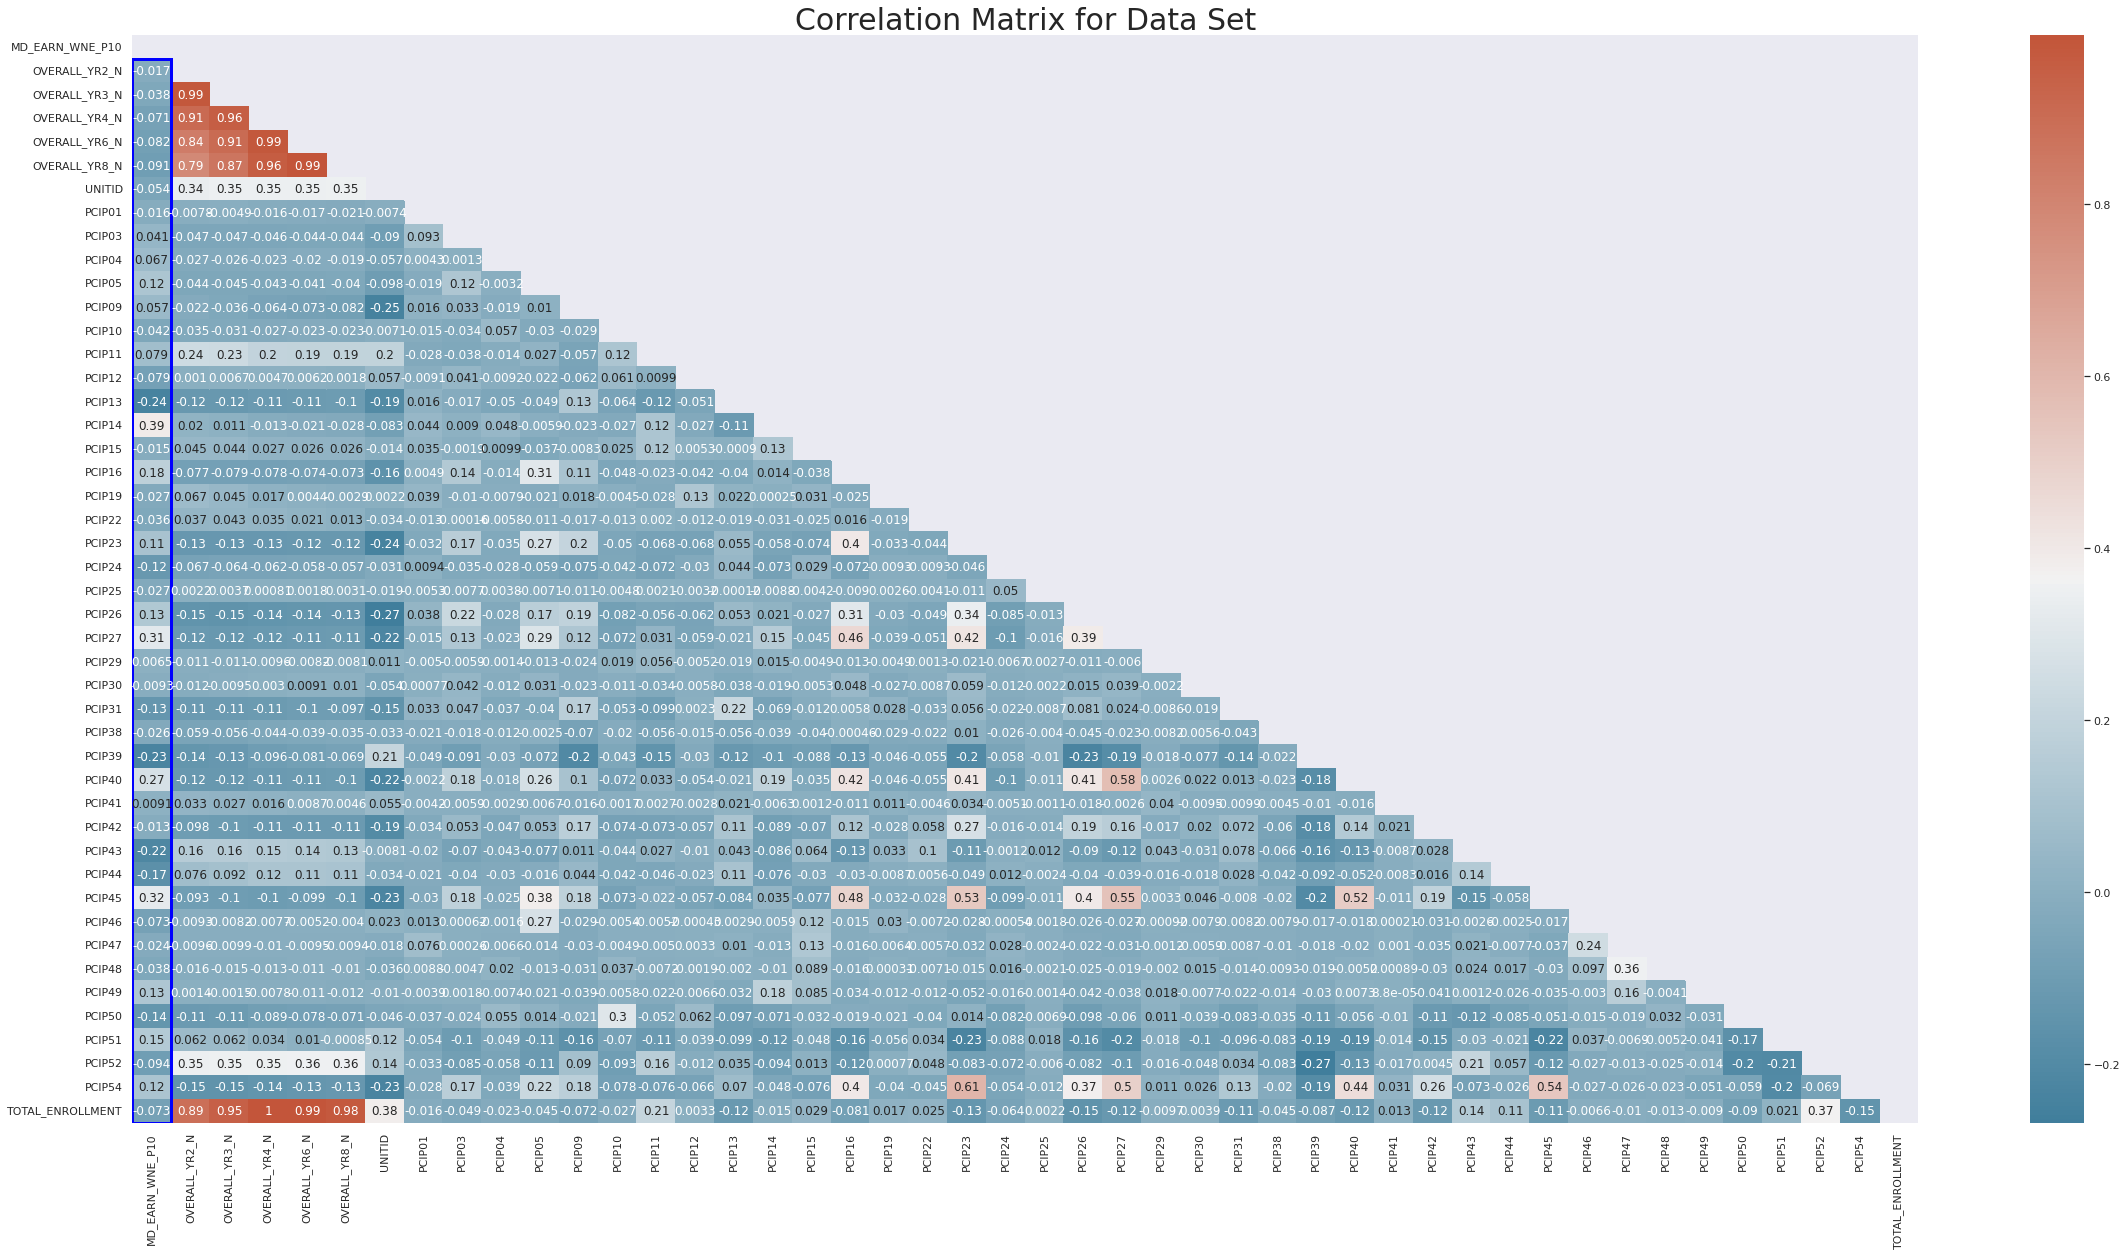

In [ ]:
from matplotlib.patches import Rectangle

corr = df.corr()
f, ax = plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
ax.set_title('Correlation Matrix for Data Set', fontsize = 30)
ax.add_patch(Rectangle((0,1),1,45, fill=False, edgecolor='blue', lw=3));

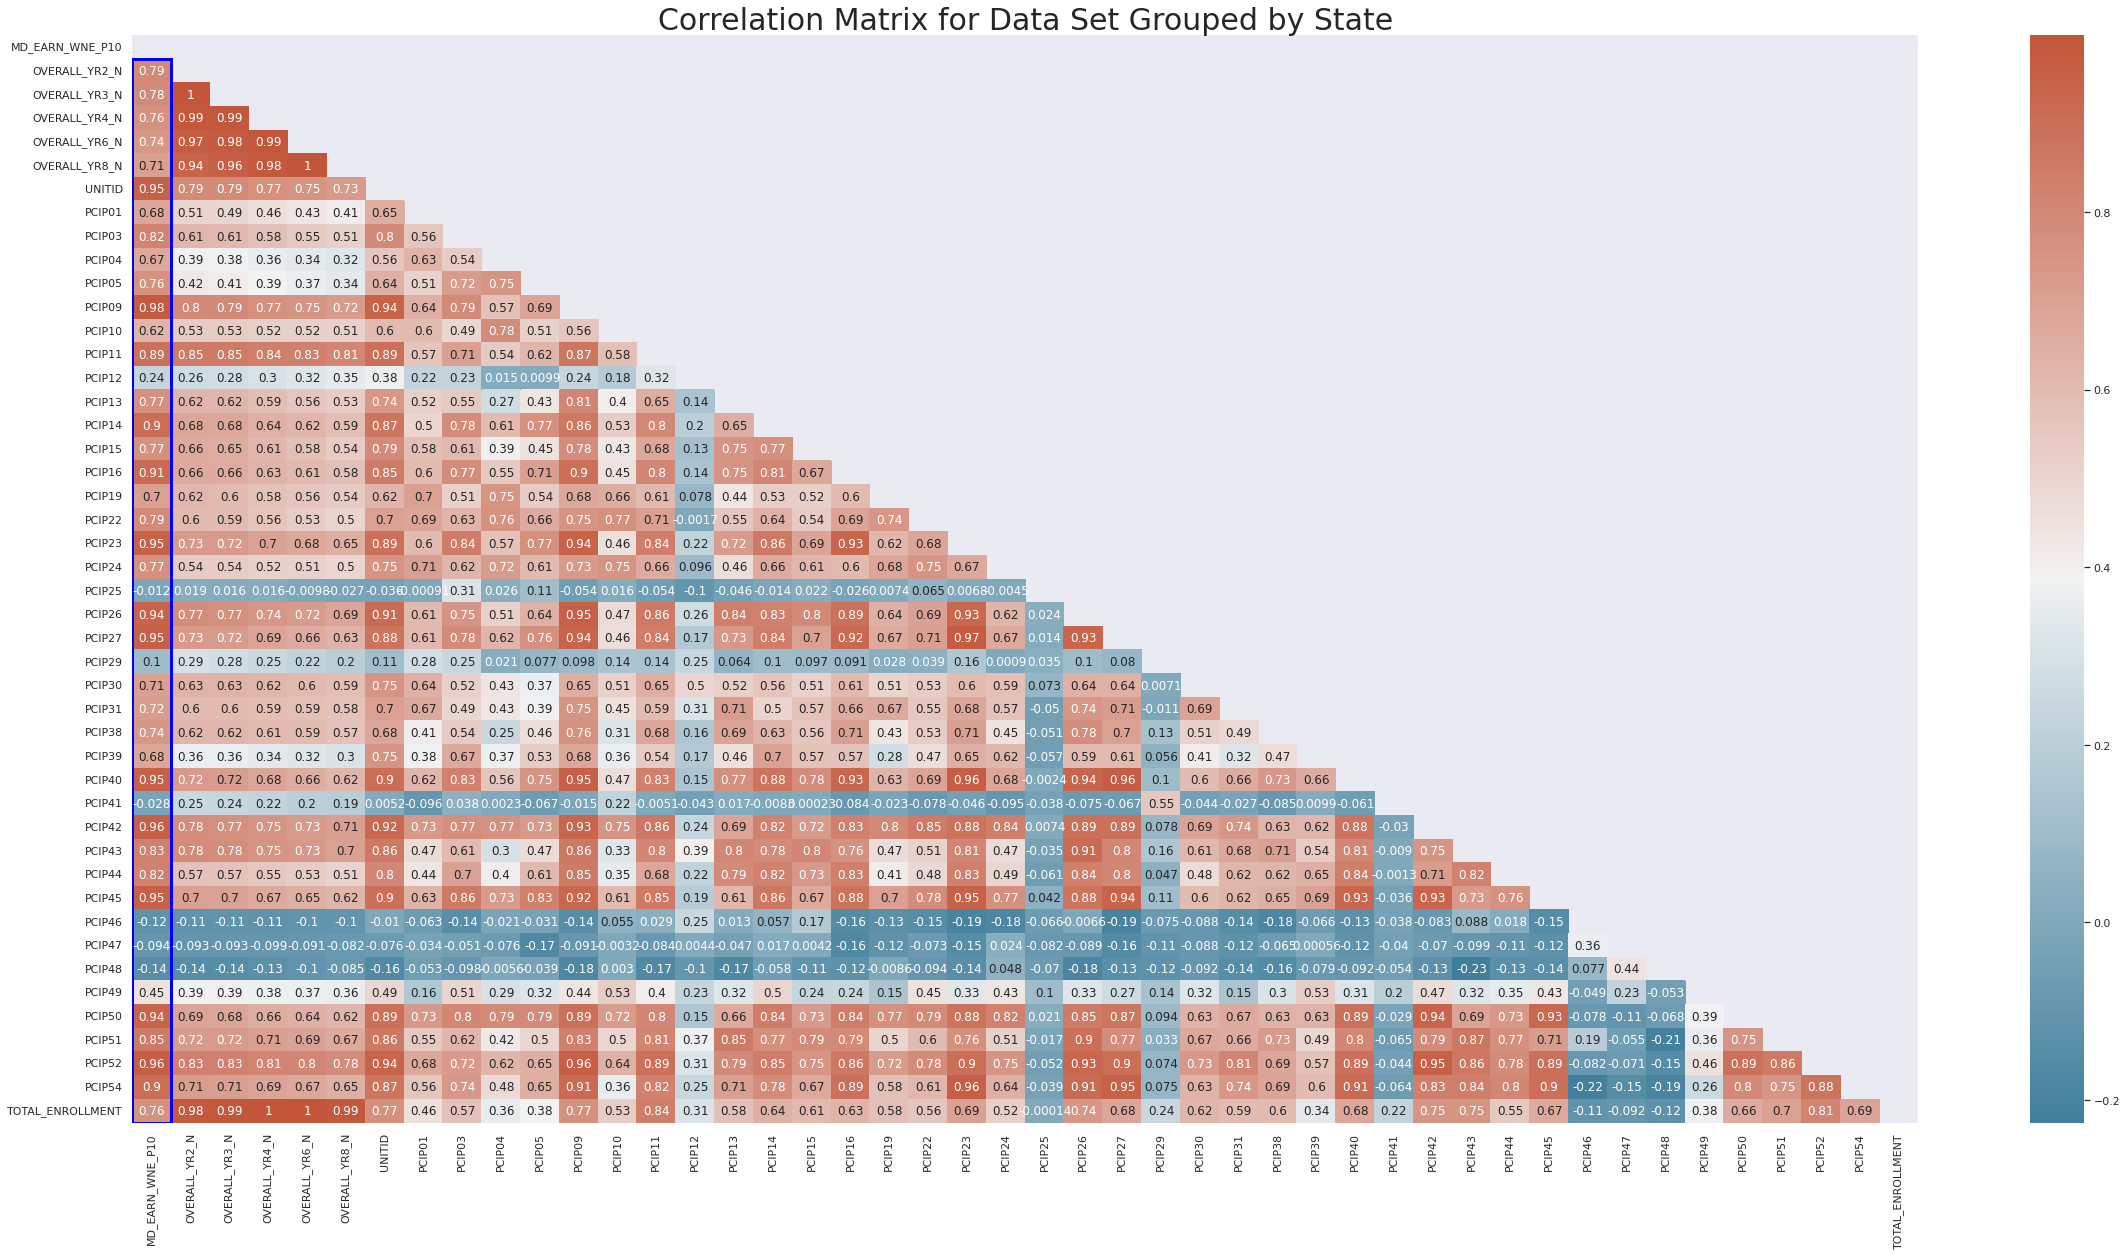

In [ ]:
corr = df_grouped_state.corr()
f, ax = plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
ax.set_title('Correlation Matrix for Data Set Grouped by State', fontsize = 30)
ax.add_patch(Rectangle((0,1),1,45, fill=False, edgecolor='blue', lw=3));

In [ ]:
pct_columns = list(df.filter(regex = 'PCIP*').columns)
all_enroll_pct_columns = pct_columns
all_enroll_pct_columns.append('TOTAL_ENROLLMENT')

In [ ]:
percent_degrees_df = df.filter(regex = 'PCIP*')
percent_series = percent_degrees_df.mean().sort_values(ascending=False)
percent_df = pd.DataFrame({'degree':percent_series.index, 'median':percent_series.values})
#percent_df

In [ ]:
df_grouped_state
grouped_percent_degrees_df = df_grouped_state.filter(regex = 'PCIP*')
grouped_percent_series = grouped_percent_degrees_df.mean().sort_values(ascending=False)
grouped_percent_df = pd.DataFrame({'degree':grouped_percent_series.index, 'median':grouped_percent_series.values})
#grouped_percent_df

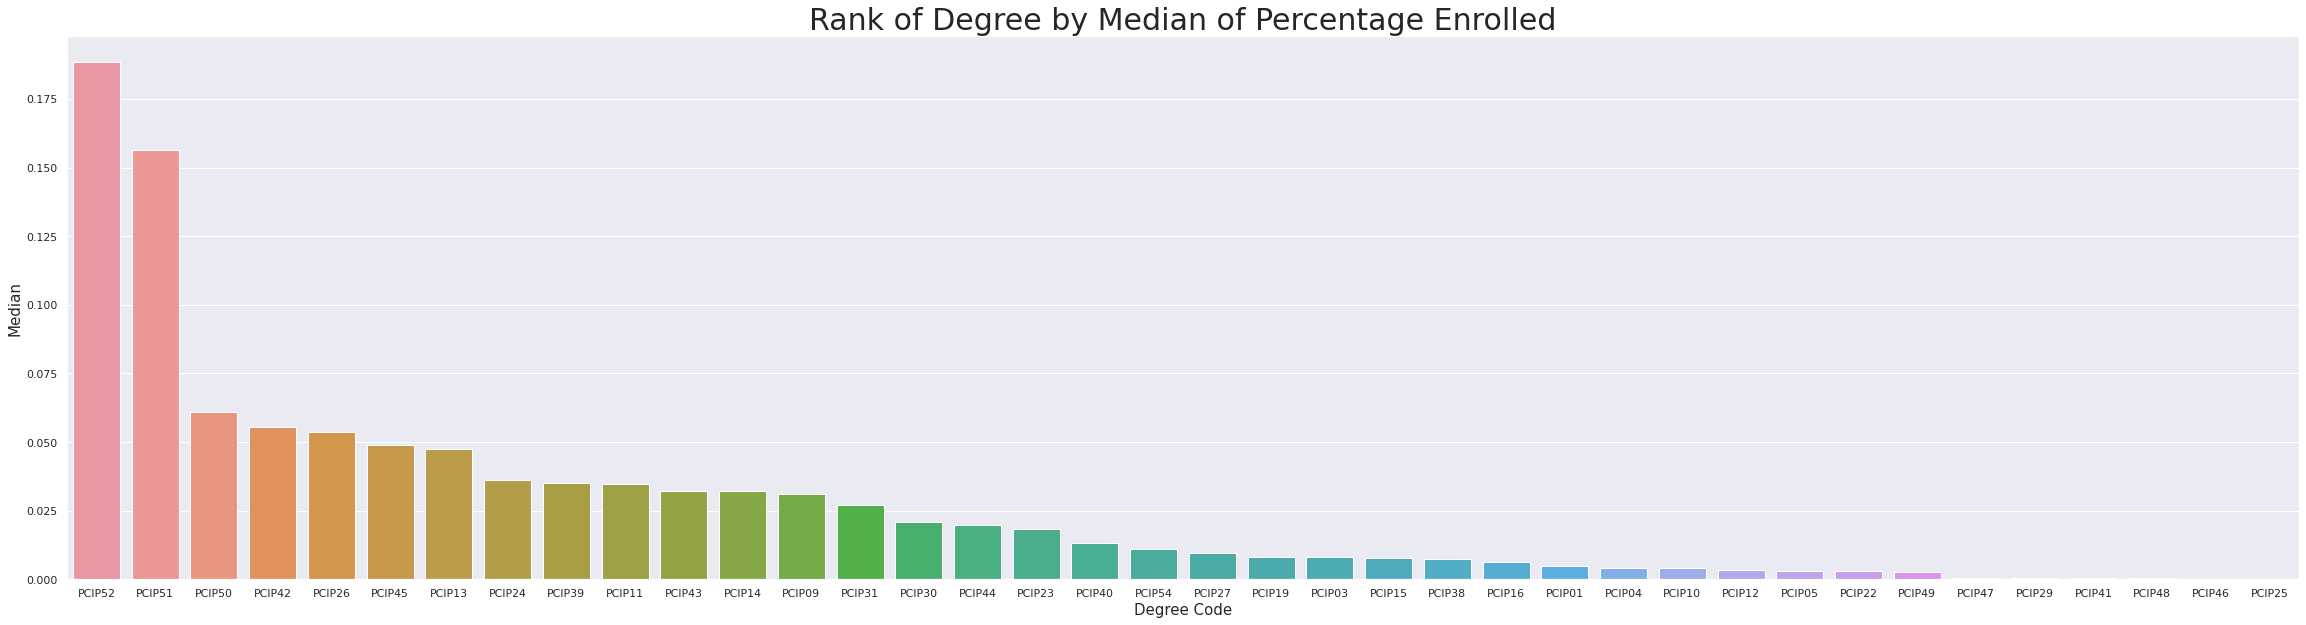

In [ ]:

sns.set(rc={'figure.figsize':(40,10)})
sns.barplot(x="degree", y="median", data=percent_df);
fig = plt.xlabel("Degree Code", fontsize = 15)
plt.ylabel("Median", fontsize = 15)
plt.title("Rank of Degree by Median of Percentage Enrolled", fontsize = 30)

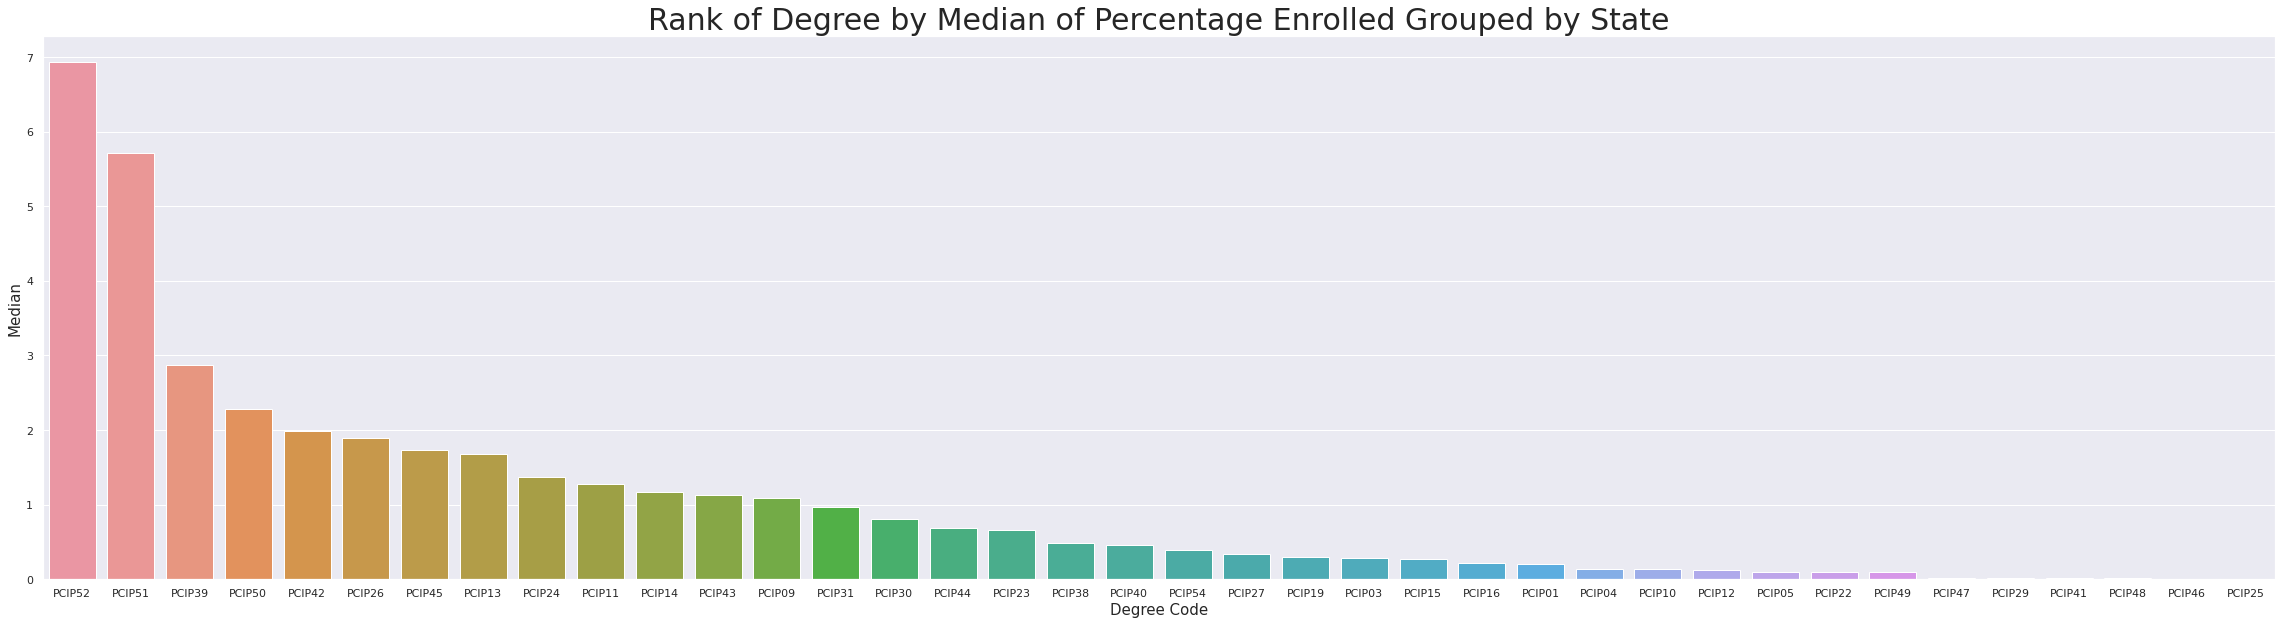

In [ ]:
sns.set(rc={'figure.figsize':(40,10)})
sns.barplot(x="degree", y="median", data=grouped_percent_df);
fig = plt.xlabel("Degree Code", fontsize = 15)
plt.ylabel("Median", fontsize = 15)
plt.title("Rank of Degree by Median of Percentage Enrolled Grouped by State", fontsize = 30)
plt.show(fig);

In [ ]:
pct_top_5_cols = ['MD_EARN_WNE_P10','PCIP52','PCIP51','PCIP11','PCIP42','PCIP43']
top_5_pct_df = df[pct_top_5_cols]
top_5_pct_df.head()

,MD_EARN_WNE_P10,PCIP52,PCIP51,PCIP11,PCIP42,PCIP43
12028,"36,339.00",0.16,0.00,0.06,0.06,0.06
12029,"46,990.00",0.19,0.23,0.01,0.06,0.03
12030,"37,895.00",0.46,0.00,0.00,0.00,0.11
12031,"54,361.00",0.21,0.15,0.06,0.02,0.00
12032,"32,084.00",0.11,0.17,0.06,0.06,0.09


In [ ]:
grouped_pct_top_5_cols = ['MD_EARN_WNE_P10','PCIP52','PCIP51','PCIP11','PCIP42','PCIP43']
grouped_top_5_pct_df = df_grouped_state[grouped_pct_top_5_cols]
grouped_top_5_pct_df.head()

,MD_EARN_WNE_P10,PCIP52,PCIP51,PCIP11,PCIP42,PCIP43
0,"138,886.00",0.37,0.41,0.04,0.29,0.10
1,"1,354,620.00",7.60,4.21,0.93,1.62,1.54
2,"919,136.00",4.97,2.68,0.57,1.35,0.37
3,"1,003,883.00",3.60,2.62,1.05,1.08,0.73
4,"7,169,295.00",26.78,13.57,4.61,11.77,1.59


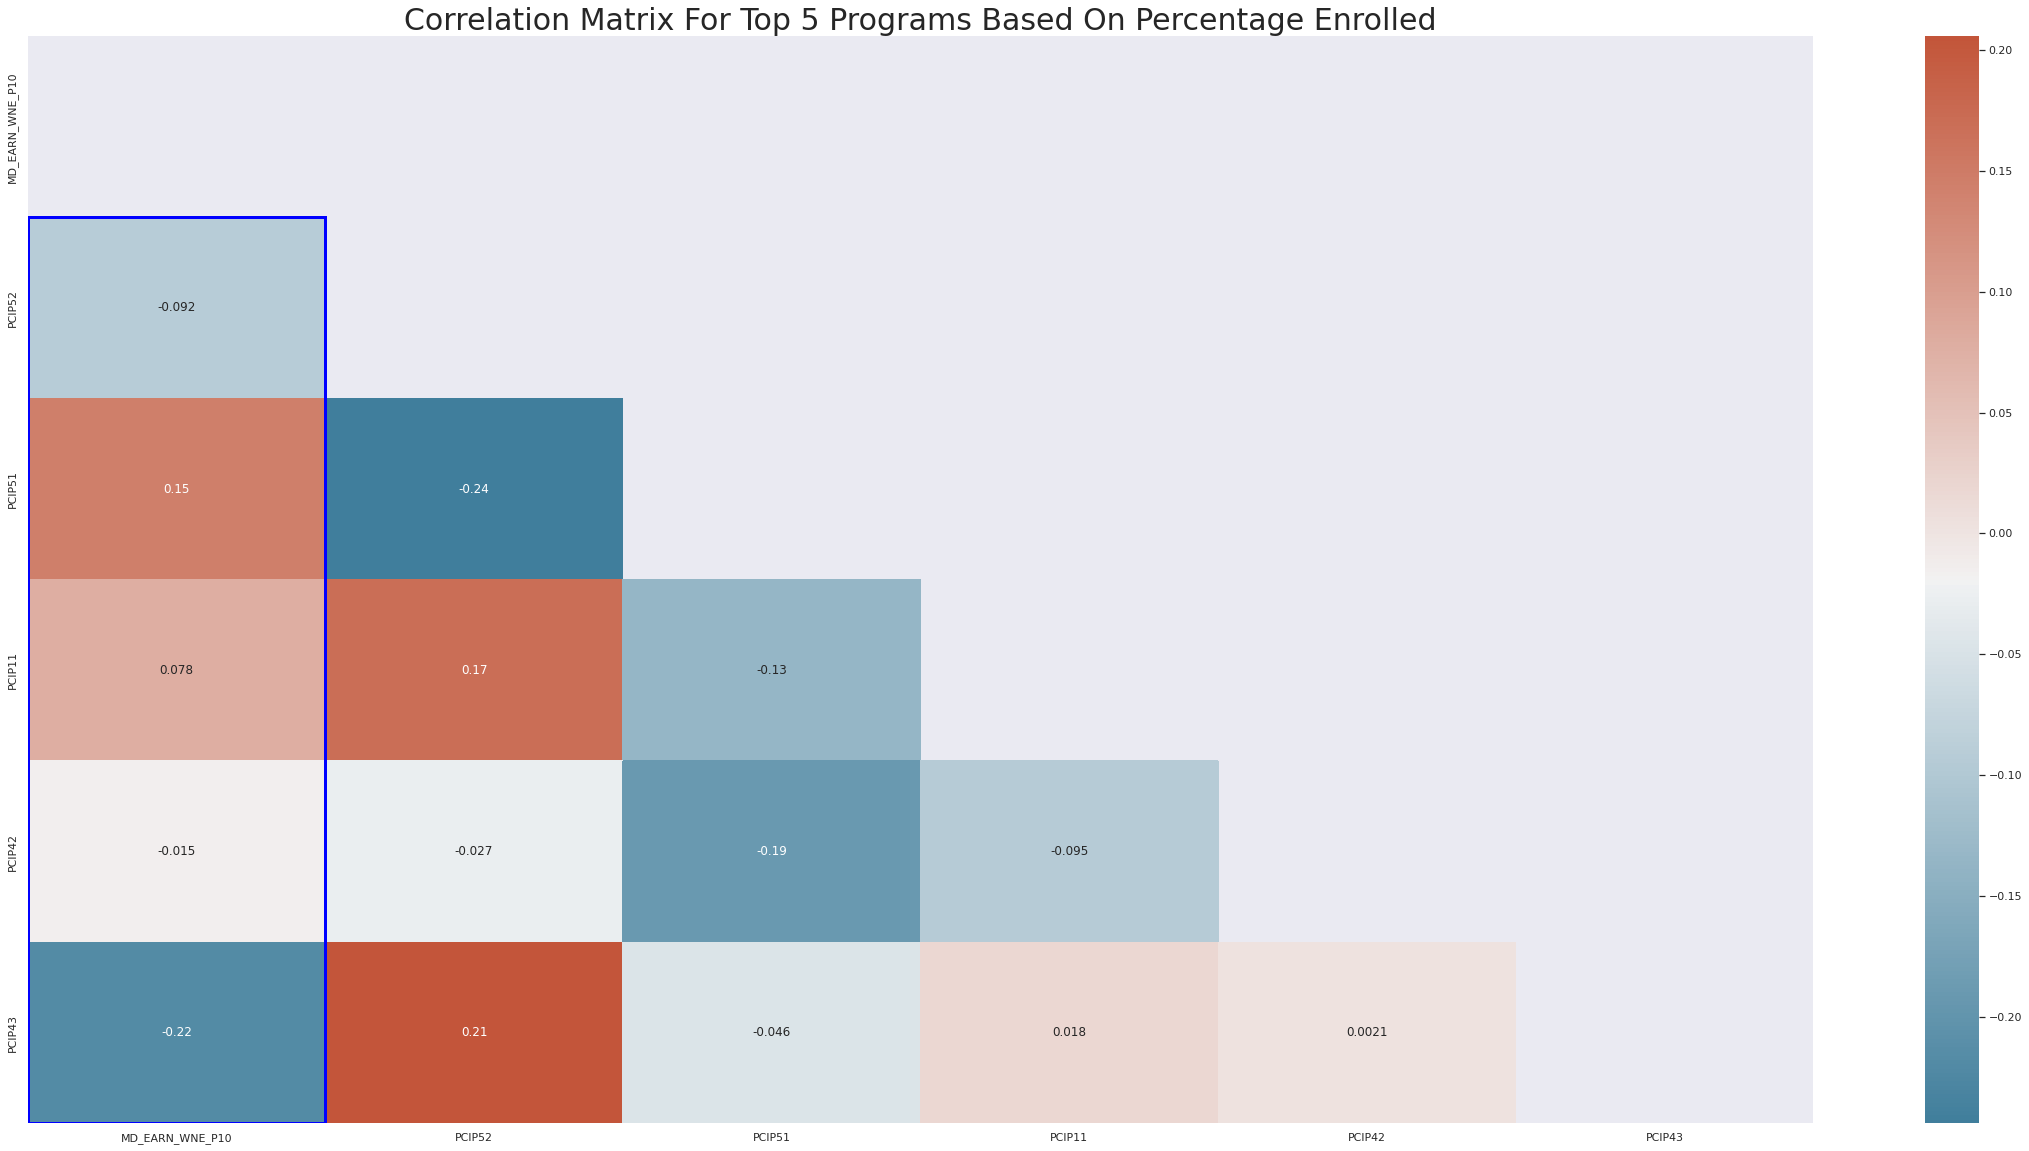

In [ ]:
corr = top_5_pct_df.corr()
f, ax = plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
ax.set_title('Correlation Matrix For Top 5 Programs Based On Percentage Enrolled', fontsize = 30)
ax.add_patch(Rectangle((0,1),1,5, fill=False, edgecolor='blue', lw=3));

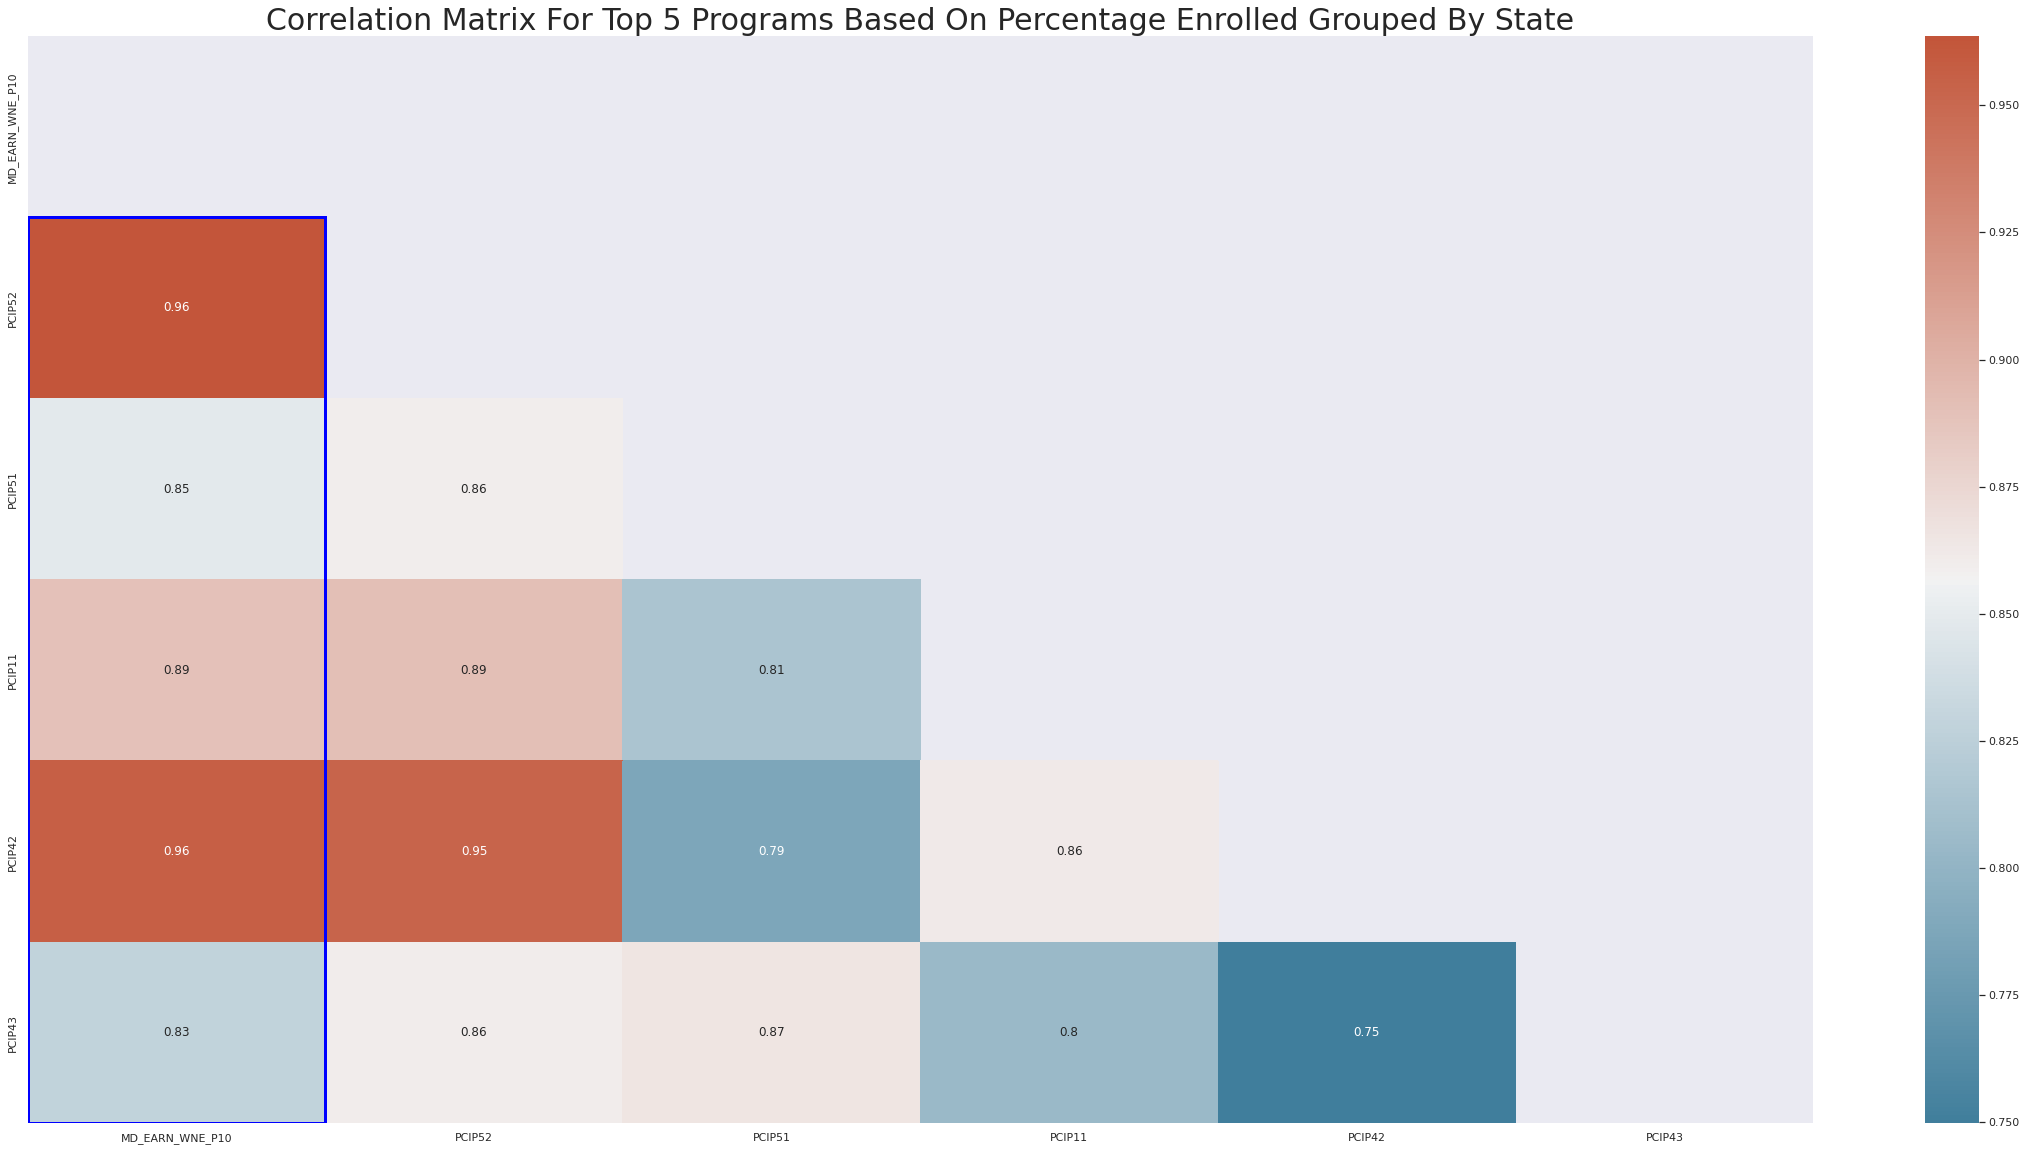

In [ ]:
corr = grouped_top_5_pct_df.corr()
f, ax = plt.subplots(figsize=(40, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)
ax.set_title('Correlation Matrix For Top 5 Programs Based On Percentage Enrolled Grouped By State', fontsize = 30)
ax.add_patch(Rectangle((0,1),1,5, fill=False, edgecolor='blue', lw=3));

In [ ]:
total_enroll_df = df[all_enroll_pct_columns]
total_enroll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1876 entries, 12028 to 14085
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PCIP01            1876 non-null   float64
 1   PCIP03            1876 non-null   float64
 2   PCIP04            1876 non-null   float64
 3   PCIP05            1876 non-null   float64
 4   PCIP09            1876 non-null   float64
 5   PCIP10            1876 non-null   float64
 6   PCIP11            1876 non-null   float64
 7   PCIP12            1876 non-null   float64
 8   PCIP13            1876 non-null   float64
 9   PCIP14            1876 non-null   float64
 10  PCIP15            1876 non-null   float64
 11  PCIP16            1876 non-null   float64
 12  PCIP19            1876 non-null   float64
 13  PCIP22            1876 non-null   float64
 14  PCIP23            1876 non-null   float64
 15  PCIP24            1876 non-null   float64
 16  PCIP25            1876 non-null   flo

In [ ]:
total_enroll_df = total_enroll_df[pct_columns].multiply(df["TOTAL_ENROLLMENT"], axis="index")
total_enroll_df.drop(columns=['TOTAL_ENROLLMENT'], inplace = True)
total_enroll_df['SUMMED'] = total_enroll_df[list(df.filter(regex = 'PCIP*').columns)].sum(axis=1)
total_enroll_df['TOTAL_ENROLLMENT'] = df["TOTAL_ENROLLMENT"]
total_enroll_df.head()

,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,SUMMED,TOTAL_ENROLLMENT
12028,282.10,169.69,27.92,0.00,0.00,282.10,423.87,0.00,508.36,847.03,141.05,0.00,282.10,0.00,113.13,338.67,0.00,663.73,42.24,0.00,0.00,14.32,0.00,0.00,254.18,0.00,451.80,409.55,352.99,254.18,0.00,0.00,0.00,0.00,169.69,0.00,"1,129.85",0.00,"7,158.57","7,160.00"
12029,0.00,0.00,0.00,22.15,519.15,0.00,192.43,0.00,992.61,"1,125.52",0.00,55.38,0.00,0.00,286.57,485.92,0.00,"1,212.73",155.05,0.00,0.00,0.00,88.60,0.00,325.33,11.08,833.41,369.63,364.10,436.09,0.00,0.00,0.00,0.00,469.31,"3,121.82","2,641.44",138.44,"13,846.77","13,844.00"
12030,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,141.22,0.00,0.00,23.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,164.78,0.00,0.00,0.00,82.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,353.05,0.00,765.00,765.00
12031,0.00,0.00,0.00,0.00,119.21,0.00,362.56,0.00,173.90,"1,777.13",0.00,104.47,0.00,0.00,94.02,0.00,0.00,267.92,94.02,0.00,4.92,129.05,14.75,0.00,188.65,0.00,124.13,0.00,0.00,148.71,0.00,0.00,0.00,0.00,233.51,948.17,"1,295.37",64.52,"6,145.00","6,145.00"
12032,0.00,0.00,0.00,0.00,634.21,0.00,415.94,0.00,831.16,0.00,0.00,0.00,0.00,0.00,87.45,0.00,0.00,590.84,120.16,0.00,142.20,76.79,0.00,0.00,164.24,0.00,426.60,666.92,459.31,98.12,0.00,0.00,0.00,0.00,415.94,"1,192.35",755.08,32.71,"7,110.00","7,110.00"


In [ ]:
percent_degrees_df2 = total_enroll_df.filter(regex = 'PCIP*')
percent_series2 = percent_degrees_df2.sum().sort_values(ascending=False)
percent_df2 = pd.DataFrame({'degree':percent_series2.index, 'median':percent_series2.values})
percent_df2

,degree,median
0,PCIP52,"9,011,750.94"
1,PCIP51,"4,298,126.38"
2,PCIP11,"1,856,238.72"
3,PCIP43,"1,392,247.91"
4,PCIP42,"875,265.01"
5,PCIP44,"835,003.32"
6,PCIP14,"697,884.71"
7,PCIP45,"689,195.39"
8,PCIP26,"674,878.00"
9,PCIP13,"663,200.76"


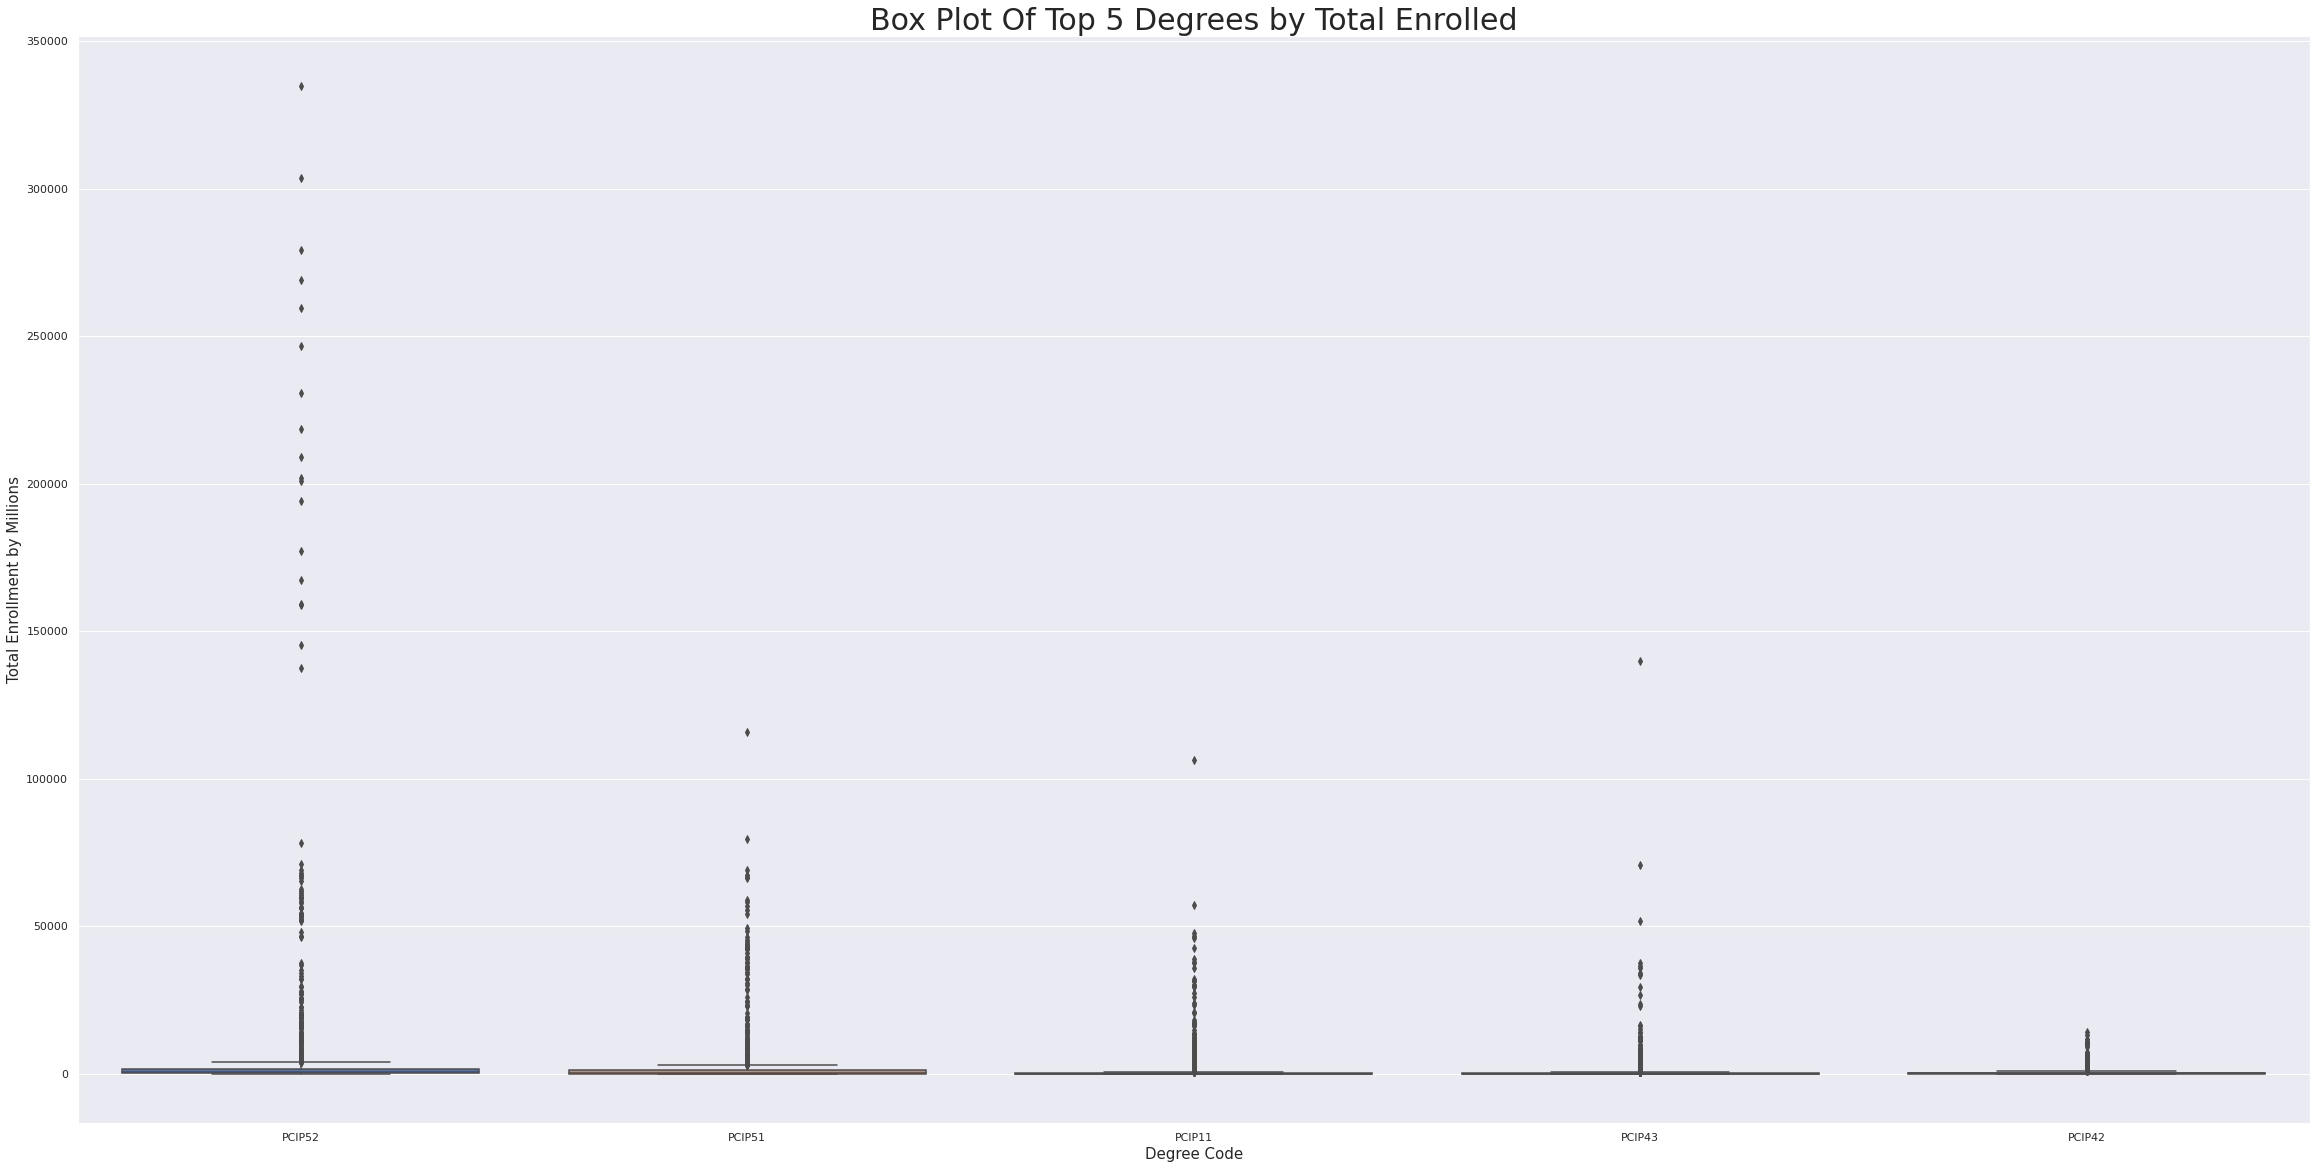

In [ ]:
df_melted = pd.melt(percent_degrees_df2[['PCIP52','PCIP51', 'PCIP11','PCIP43','PCIP42']])
sns.set(rc={'figure.figsize':(40,20)})
sns.boxplot(x="variable", y="value", data=df_melted);
fig = plt.xlabel("Degree Code", fontsize = 15)
plt.ylabel("Total Enrollment by Millions", fontsize = 15)
plt.title("Box Plot Of Top 5 Degrees by Total Enrolled", fontsize = 30) # You can comment this line out if you don't need title
plt.show(fig)